<a href="https://colab.research.google.com/github/stuporunicorn/LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics

In [3]:
credit_card_data = pd.read_csv('/content/credit card dataset.csv')

In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

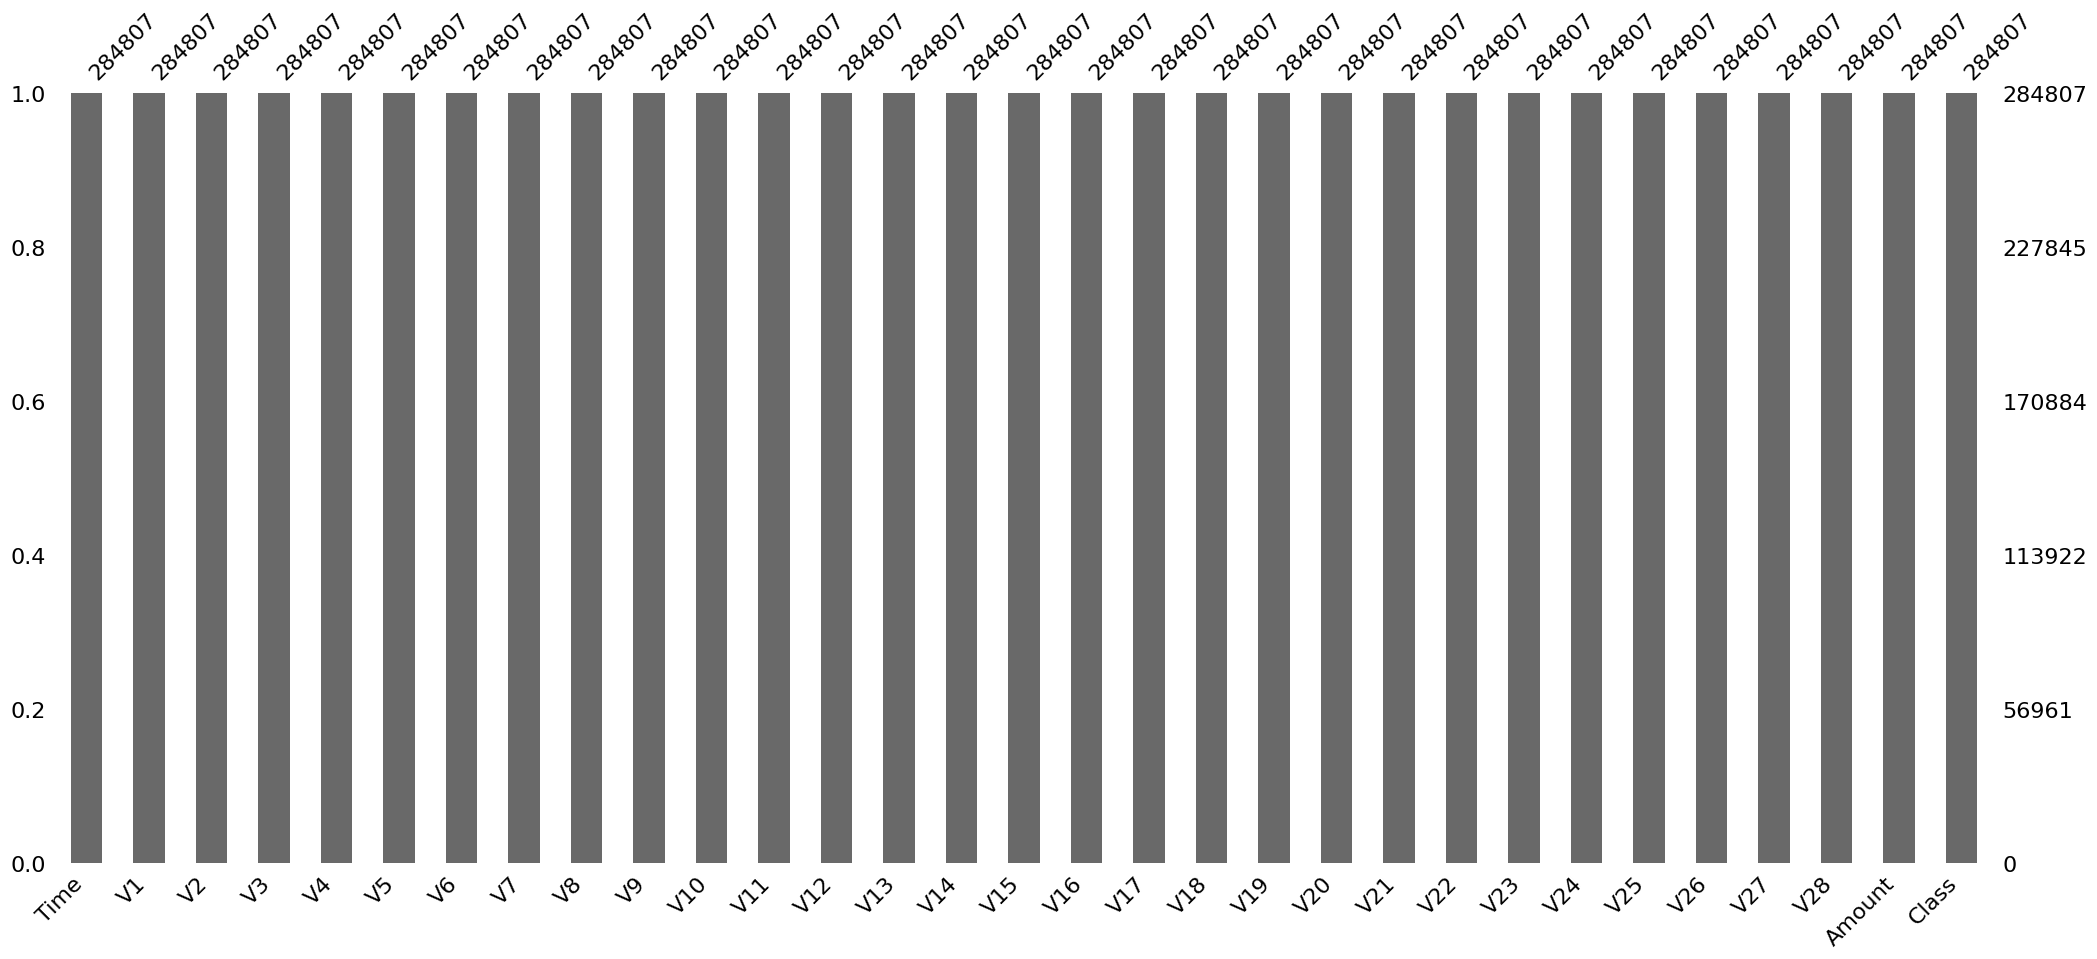

In [7]:
import missingno as ms
ms.bar(credit_card_data)

In [8]:
credit_card_data_copy=credit_card_data.copy()
credit_card_data_copy.drop_duplicates(subset=None, inplace=True)

In [9]:
credit_card_data_copy.shape

(283726, 31)

In [10]:
credit_card_data.shape

(284807, 31)

In [11]:
credit_card_data=credit_card_data_copy

In [12]:
credit_card_data.shape

(283726, 31)

In [13]:
credit_card_data_corr = credit_card_data.corr()

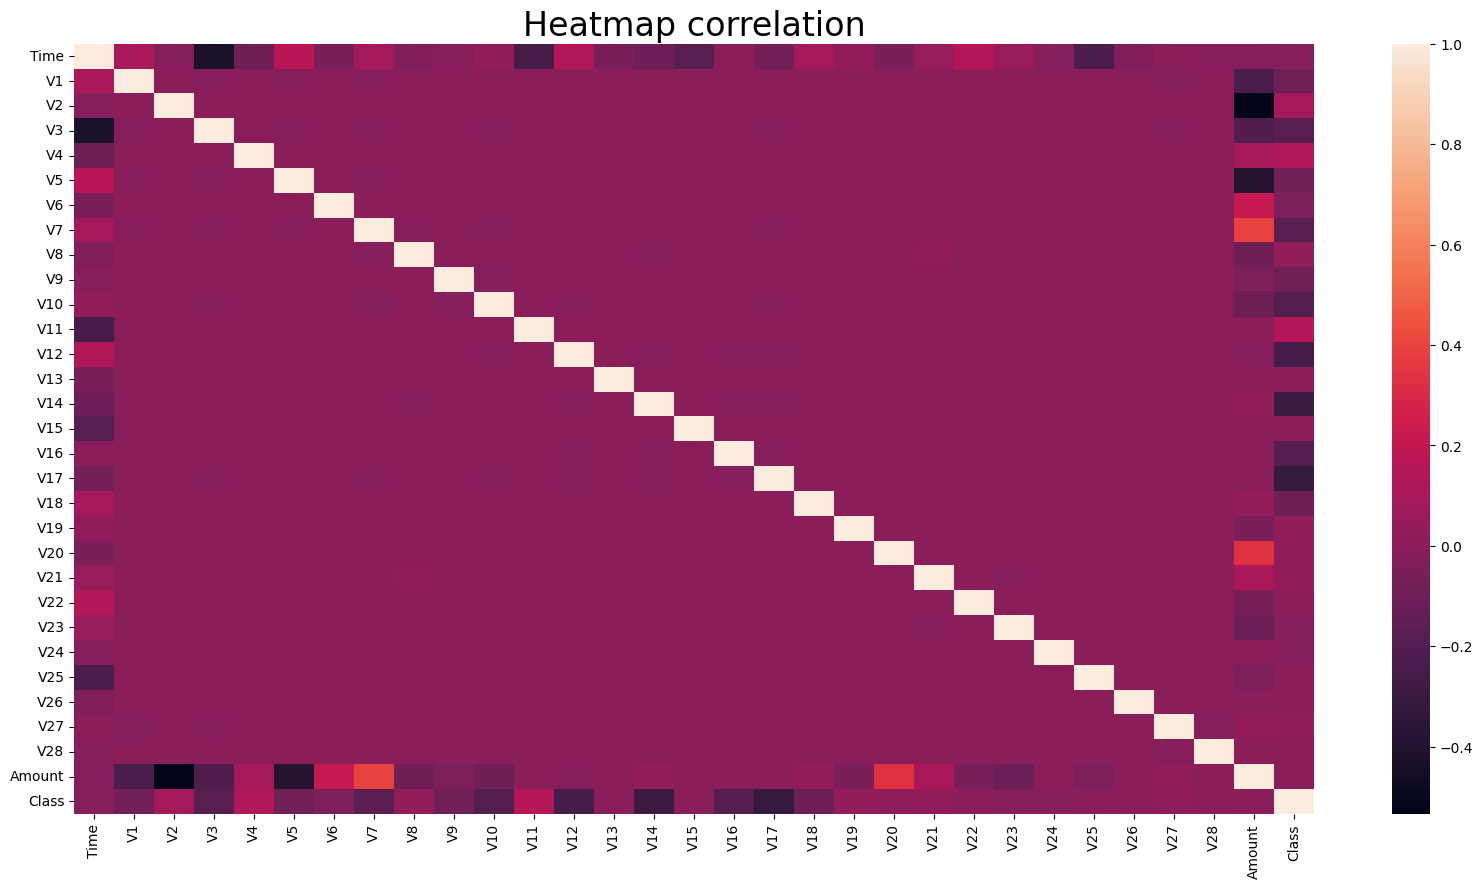

In [14]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
seaborn.heatmap(credit_card_data_corr)
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [15]:
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [16]:
legit_transactions = credit_card_data[credit_card_data.Class == 0]
fraud_transactions = credit_card_data[credit_card_data.Class == 1]

In [17]:
print(legit_transactions.shape)
print(fraud_transactions.shape)

(283253, 31)
(473, 31)


In [18]:
legit_transactions.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud_transactions.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [21]:
legit_transactions_sample = legit_transactions.sample(n=473)

In [22]:
new_credit_card = pd.concat([legit_transactions_sample, fraud_transactions], axis=0)

In [23]:
new_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38693,39498.0,-0.460210,0.521271,2.594318,3.339201,-0.262163,0.531423,-0.421048,0.322720,-0.246299,...,0.165926,0.780524,-0.165697,0.449810,-0.318465,0.383355,0.207440,0.170064,0.00,0
191809,129417.0,1.905441,-0.620106,-0.498945,0.388327,-0.545906,-0.044857,-0.624398,0.021016,1.225455,...,0.178351,0.587246,0.123654,0.642682,-0.247726,0.538338,-0.033243,-0.031569,64.99,0
283310,171511.0,-0.159591,-0.071297,1.014789,3.907791,0.733700,7.036151,-0.276740,1.246294,-0.026692,...,0.194846,1.188686,0.257655,0.752151,-1.433959,0.356729,0.243032,-0.000409,287.98,0
106772,70116.0,-0.728481,0.943715,0.250279,-0.314214,2.292711,3.709572,-0.036293,0.822690,-0.721695,...,-0.276793,-0.828171,-0.154861,1.009354,0.019610,0.314775,-0.668466,-0.426215,4.49,0
134390,80781.0,-0.295454,0.690211,0.974305,1.229822,-0.116475,0.828774,0.835956,0.137601,-0.447584,...,0.022612,0.242309,-0.075483,-0.292236,-0.042334,-0.241955,0.001273,-0.008504,117.92,0


In [24]:
new_credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_credit_card['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [26]:
new_credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93924.158562,0.038975,0.053232,0.105176,0.043987,0.043763,-0.049246,0.089573,0.038046,0.075481,...,-0.010917,0.017968,0.025332,-0.025692,-0.047656,-0.004854,0.011139,0.002811,0.010913,82.669535
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [27]:
X = new_credit_card.iloc[:,0:30]
Y = new_credit_card['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
38693    39498.0 -0.460210  0.521271  2.594318  3.339201 -0.262163  0.531423   
191809  129417.0  1.905441 -0.620106 -0.498945  0.388327 -0.545906 -0.044857   
283310  171511.0 -0.159591 -0.071297  1.014789  3.907791  0.733700  7.036151   
106772   70116.0 -0.728481  0.943715  0.250279 -0.314214  2.292711  3.709572   
134390   80781.0 -0.295454  0.690211  0.974305  1.229822 -0.116475  0.828774   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

38693     0
191809    0
283310    0
106772    0
134390    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=5)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
X_train_prediction_logistic = model.predict(X_train)
training_accuracy_logistic = accuracy_score(X_train_prediction_logistic, Y_train)

In [35]:
print('Accuracy on Training data through Logistic Regression: ', training_accuracy_logistic)

Accuracy on Training data through Logistic Regression:  0.917989417989418


In [36]:
X_test_prediction_logistic = model.predict(X_test)
test_accuracy_logistic = accuracy_score(X_test_prediction_logistic, Y_test)

In [37]:
print('Accuracy score on Test Data through Logistics Regression: ', test_accuracy_logistic)

Accuracy score on Test Data through Logistics Regression:  0.9210526315789473


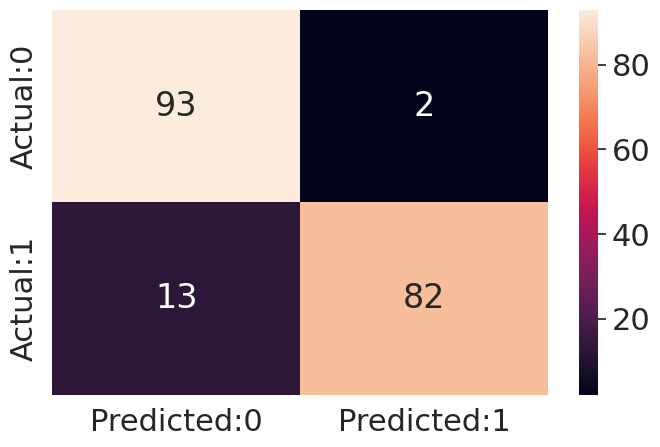

In [38]:
log=confusion_matrix(Y_test,X_test_prediction_logistic,labels=model.classes_)
conf_matrix=pd.DataFrame(data=log,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
seaborn.heatmap(conf_matrix, annot=True,fmt='d');

In [39]:
TP=log[0,0]
TN=log[1,1]
FP=log[1,0]
FN=log[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Sensitivity is:",sensitivity)
print("Specificity is:",specificity)
print("Accuracy is:",accuracy)

Sensitivity is: 0.9789473684210527
Specificity is: 0.8631578947368421
Accuracy is: 0.9210526315789473


In [40]:
model1=svm.SVC(kernel="linear")

In [41]:
model1.fit(X_train,Y_train)

SVC(kernel='linear')

In [42]:
X_train_prediction_svm = model1.predict(X_train)
training_accuracy_svm=accuracy_score(X_train_prediction_svm,Y_train)

In [43]:
print('Accuracy on Training data through SVM: ', training_accuracy_logistic)

Accuracy on Training data through SVM:  0.917989417989418


In [44]:
X_test_prediction_svm=model1.predict(X_test)
test_accuracy_svm=accuracy_score(X_test_prediction_svm,Y_test)

In [45]:
print('Accuracy score on Test Data through SVM: ',test_accuracy_svm)

Accuracy score on Test Data through SVM:  0.8789473684210526


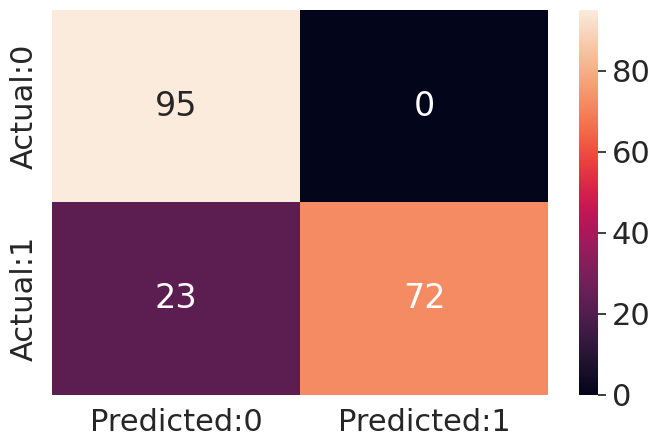

In [46]:
svm1=confusion_matrix(Y_test,X_test_prediction_svm,labels=model1.classes_)
conf_matrix1=pd.DataFrame(data=svm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
seaborn.heatmap(conf_matrix1, annot=True,fmt='d');

In [47]:
TP=svm1[0,0]
TN=svm1[1,1]
FP=svm1[1,0]
FN=svm1[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Sensitivity is:",sensitivity)
print("Specificity is:",specificity)
print("Accuracy is:",accuracy)

Sensitivity is: 1.0
Specificity is: 0.7578947368421053
Accuracy is: 0.8789473684210526


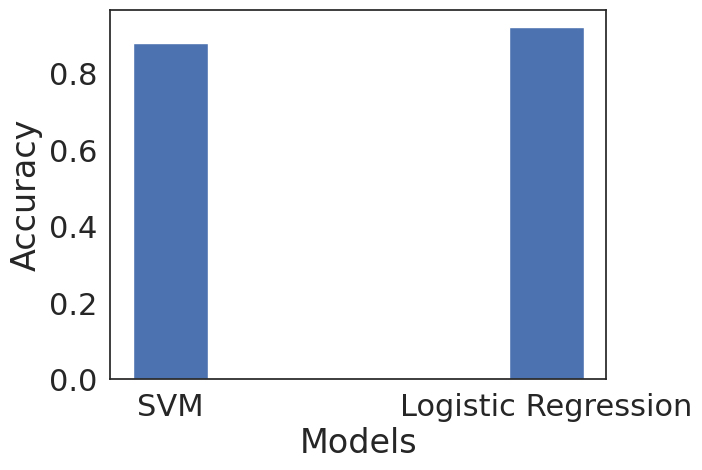

In [48]:
x_axis=['SVM','Logistic Regression']
y_axis=[test_accuracy_svm,test_accuracy_logistic]
plt.bar(x_axis, y_axis,width=0.2)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()